In [111]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Opening files

In [4]:
#On online version
#df = pd.read_csv('/data_mlhep2017/episode1/DS_1_train.csv', index_col=0)

#On my MAC
df = pd.read_csv('../OPERA_competition_draft_train/DS_1_train.csv', index_col=0)
edata = pd.read_csv('../OPERA_competition_draft_train/DS_1_electron_train.csv')
df.head()

,event_id,X,Y,Z,TX,TY,chi2,signal
index,,,,,,,,
0,-999,61300.121094,64934.265625,28446.0,0.286310,0.096968,1.195497,False
1,-999,49399.164062,63663.652344,54306.0,0.037705,0.097359,1.820736,False
2,-999,58955.164062,33590.734375,24567.0,0.421410,-0.039955,2.799580,False
3,-999,57421.613281,34333.390625,11637.0,0.118750,-0.498493,2.725356,False
4,-999,58730.507812,60918.179688,58185.0,-0.085305,0.078348,2.814739,False


In [5]:
edata.head()

,index,event_id,P,X,Y,Z,TX,TY
0,0,2573,4.751912,39813.222656,16733.853516,37461.781250,0.080777,0.067206
1,1,5435,11.581161,49247.546875,66064.312500,27072.914062,-0.124120,0.004981
2,2,4110,4.723818,40268.484375,15453.179688,8178.457031,0.037599,0.175117
3,3,6421,5.161797,40988.937500,42040.226562,21976.783203,-0.053018,-0.021330
4,4,9112,4.461930,42774.335938,35231.640625,15610.662109,-0.144262,0.159017


# Ordering the files by Z

In [18]:
df_sorted = df.sort_values('Z')
edata_sorted=edata.sort_values("Z")
print(df_sorted[100000:100010])
print(edata_sorted)

         event_id             X             Y       Z        TX        TY  \
index                                                                       
1218777      -999  31534.365234  38999.617188  2586.0  0.314918 -0.042039   
1757055      -999  35936.109375  35514.851562  2586.0 -0.127902  0.057180   
190604       -999  53047.664062  65176.546875  2586.0 -0.043155 -0.057980   
2570490      -999  56963.757812  54584.421875  2586.0 -0.014621  0.238039   
1022997      -999  44988.484375  49598.718750  2586.0 -0.176693 -0.039658   
2767893      -999  63002.500000  51954.195312  2586.0  0.162277  0.117746   
2182888      -999  52160.628906  71229.656250  2586.0 -0.354688  0.049665   
13536        -999  60774.476562  51638.742188  2586.0 -0.165904 -0.130227   
1536659      -999  40192.316406  76067.578125  2586.0  0.316443 -0.021540   
1240776      -999  54029.382812  54941.335938  2586.0 -0.269624 -0.579148   

             chi2  signal  
index                      
1218777  2.423497  

# Creating some functions

In [143]:
def distance3D(x1,y1,z1,x2,y2,z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
def distance2D(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
def e_projection(x,theta,Dplate):
    return x+theta*Dplate*1293
def projection(x,theta,DZ):
    return x+theta*DZ
def ComputeIP(p_xBT,p_yBT,x0,y0):
    return distance2D(p_xBT,p_yBT,x0,y0)
def plate(z):
    return (z/1293)

# Adding plate to datasets

In [141]:
e_plt = pd.Series(plate(edata_sorted['Z']).astype(int))
edata_sorted = edata_sorted.assign(e_plt=e_plt.values)
#print(plt)

df_plt=pd.Series(plate(df_sorted['Z']))
df_sorted = df_sorted.assign(df_plt=df_plt.values)
#print(df_sorted[100000:100010])

# Selecting BT in cone around electron

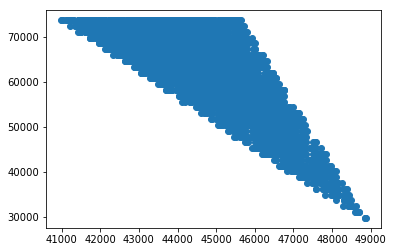

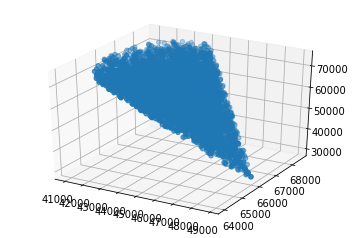

In [319]:
train_df = np.array([])
#train_db = np.array([])
for i in range(len(edata_sorted)):
    df_sorted_zcut = df_sorted[df_sorted['Z']>edata_sorted['Z'][i]]
    #df_sorted_zcut = df_sorted
    xe = e_projection(edata_sorted['X'][i],edata_sorted['TX'][i],df_sorted_zcut['df_plt']-edata_sorted['e_plt'][i])
    ye = e_projection(edata_sorted['Y'][i],edata_sorted['TY'][i],df_sorted_zcut['df_plt']-edata_sorted['e_plt'][i])
    ze = df_sorted_zcut['Z']
    dist = distance3D(xe,ye,ze,edata_sorted['X'][i],edata_sorted['Y'][i],edata_sorted['Z'][i])
    R = np.tan(0.05)*dist
    #print(R)
    d = distance2D(df_sorted_zcut['X'],df_sorted_zcut['Y'],xe,ye)
    #print(dist)
    #BT_Theta = np.sqrt(pow(df_sorted_zcut['TX'],2)+pow(df_sorted_zcut['TY'],2))
    sel_BT = df_sorted_zcut[d<R]
    #sel_BT = df_sorted_zcut
    #print(df_sorted.shape,df_sorted_zcut.shape,sel_BT.shape)
    if i==1:
        fig, ax = plot.subplots()
        ax.scatter(sel_BT["X"],sel_BT["Z"])
        plot.show()
        fig1 = plot.figure()
        ax1 = fig1.add_subplot(111, projection='3d')
        ax1.scatter(sel_BT["X"],sel_BT["Y"],sel_BT["Z"])
    #sel_BT.append(df_sorted_zcut[(BT_Theta - e_Theta)*1000 < 50])
    DSX = pd.Series(sel_BT['TX']-edata_sorted['TX'][i])
    sel_BT = sel_BT.assign(DSX = DSX.values)
    DSY = pd.Series(sel_BT['TY']-edata_sorted['TY'][i])
    sel_BT = sel_BT.assign(DSY = DSY.values)
    p_xBT = projection(sel_BT['X'],sel_BT['TX'],sel_BT['Z']-edata_sorted['Z'][i])
    p_yBT = projection(sel_BT['Y'],sel_BT['TY'],sel_BT['Z']-edata_sorted['Z'][i])
    IP = pd.Series(ComputeIP(p_xBT,p_yBT,edata_sorted['X'][i],edata_sorted['Y'][i]))
    sel_BT = sel_BT.assign(IP = IP.values)
    xe1 = e_projection(edata_sorted['X'][i],edata_sorted['TX'][i],sel_BT['df_plt']-edata_sorted['e_plt'][i])
    ye1 = e_projection(edata_sorted['Y'][i],edata_sorted['TY'][i],sel_BT['df_plt']-edata_sorted['e_plt'][i])
    ze1 = sel_BT['Z']
    dist1 = distance3D(xe1,ye1,ze1,edata_sorted['X'][i],edata_sorted['Y'][i],edata_sorted['Z'][i])
    alpha = pd.Series(np.arctan(distance2D(sel_BT['X'],sel_BT['Y'],xe1,ye1)/dist1))
    sel_BT = sel_BT.assign(alpha = alpha.values)
    train_df=np.append(train_df,sel_BT.values[:, 6:13])
    train_db = np.concatenate(sel_BT.values[:, 6:13])
    #if i==0:
     #   print(sel_BT[0:10])

#np.reshape(train_df,[-1,10])
#train_db = pd.DataFrame({'chi2':train_df[:,0],'signal':train_df[:,0],'IP':train_df[:,12]})


In [320]:
train_df=train_df.reshape(train_df.size/7,7)

### Build a train dataset
Ideally, you could design features here that improve model performance. 

Baseline, however, simply takes some of the features while also balansing classes.

In [ ]:
print(df[df.signal==True])

In [ ]:
print(df[df.signal==False])

### Train a model

In [357]:
#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(max_depth = 7)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7,min_samples_leaf=3)
clf.fit(X_train,y_train)

#to define best classifier, look at accuracy or ROC curve


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Prediction

In [343]:
df_test = pd.read_csv('../OPERA_competition_draft_train/DS_1_test.csv', index_col=0)
edata_test = pd.read_csv('../OPERA_competition_draft_train/DS_1_electron_test.csv')
df_test.head()

,X,Y,Z,TX,TY,chi2
index,,,,,,
0,37259.390625,62516.367188,63357.0,-0.475465,-0.250186,1.405402
1,41426.312500,57520.265625,25860.0,-0.213876,0.155208,2.541856
2,40752.921875,54653.265625,46548.0,0.044215,-0.333426,2.389629
3,29293.980469,23582.425781,14223.0,-0.265671,-0.137444,2.402328
4,49538.128906,63314.617188,31032.0,-0.063467,-0.550298,1.223460


In [344]:
edata_test.head()

,X,Y,Z,TX,TY
0,46654.187500,59809.707031,20703.253906,-0.022536,0.031416
1,40420.898438,22858.601562,13067.279297,-0.019237,0.032119
2,46282.644531,11399.347656,32160.285156,-0.062326,-0.026023
3,54976.289062,45914.261719,20705.671875,-0.176683,0.145312
4,48062.531250,38878.863281,13068.060547,0.132127,0.215309


In [345]:
e_plt = pd.Series(plate(edata_test['Z']).astype(int))
edata_test = edata_test.assign(e_plt=e_plt.values)
#print(plt)

df_plt=pd.Series(plate(df_test['Z']))
df_test = df_test.assign(df_plt=df_plt.values)

In [346]:
test_df = np.array([])
for i in range(len(edata_test)/100):
    #df_test_zcut = df_test[df_test['Z']>edata_test['Z'][i]]
    df_test_zcut = df_test
    xe = e_projection(edata_test['X'][i],edata_test['TX'][i],df_test_zcut['df_plt']-edata_test['e_plt'][i])
    ye = e_projection(edata_test['Y'][i],edata_test['TY'][i],df_test_zcut['df_plt']-edata_test['e_plt'][i])
    ze = df_test_zcut['Z']
    dist = distance3D(xe,ye,ze,edata_test['X'][i],edata_test['Y'][i],edata_test['Z'][i])
    R = np.tan(0.05)*dist
    #print(R)
    d = distance2D(df_test_zcut['X'],df_test_zcut['Y'],xe,ye)
    #print(dist)
    #BT_Theta = np.sqrt(pow(df_test_zcut['TX'],2)+pow(df_test_zcut['TY'],2))
    #sel_BT_test = df_test_zcut[d<R]
    sel_BT_test = df_test_zcut
    #print(df_test.shape,df_test_zcut.shape,sel_BT.shape)
    #if i==1:
        #fig, ax = plot.subplots()
        #ax.scatter(sel_BT["X"],sel_BT["Z"])
        #plot.show()
        #fig1 = plot.figure()
        #ax1 = fig1.add_subplot(111, projection='3d')
        #ax1.scatter(sel_BT["X"],sel_BT["Y"],sel_BT["Z"])
    #sel_BT.append(df_test_zcut[(BT_Theta - e_Theta)*1000 < 50])
    DSX = pd.Series(sel_BT_test['TX']-edata_test['TX'][i])
    sel_BT_test= sel_BT_test.assign(DSX = DSX.values)
    DSY = pd.Series(sel_BT_test['TY']-edata_test['TY'][i])
    sel_BT_test= sel_BT_test.assign(DSY = DSY.values)
    p_xBT = projection(sel_BT_test['X'],sel_BT_test['TX'],sel_BT_test['Z']-edata_test['Z'][i])
    p_yBT = projection(sel_BT_test['Y'],sel_BT_test['TY'],sel_BT_test['Z']-edata_test['Z'][i])
    IP = pd.Series(ComputeIP(p_xBT,p_yBT,edata_test['X'][i],edata_test['Y'][i]))
    sel_BT_test= sel_BT_test.assign(IP = IP.values)
    xe1 = e_projection(edata_test['X'][i],edata_test['TX'][i],sel_BT_test['df_plt']-edata_test['e_plt'][i])
    ye1 = e_projection(edata_test['Y'][i],edata_test['TY'][i],sel_BT_test['df_plt']-edata_test['e_plt'][i])
    ze1 = sel_BT_test['Z']
    dist1 = distance3D(xe1,ye1,ze1,edata_test['X'][i],edata_test['Y'][i],edata_test['Z'][i])
    alpha = pd.Series(np.arctan(distance2D(sel_BT_test['X'],sel_BT_test['Y'],xe1,ye1)/dist1))
    sel_BT_test= sel_BT_test.assign(alpha = alpha.values)
    test_df=np.append(test_df,sel_BT_test.values[:, 5:12])

print(test_df)

[  1.40540183e+00   4.90000000e+01  -4.52928545e-01 ...,  -5.12078144e-02
   2.21472724e+04   3.65328969e-01]


In [347]:
test_df=test_df.reshape(test_df.size/6,6)

In [358]:
X_test = test_df[:,0].reshape(-1,1)
X_test = np.append(X_test, test_df[:,2:6], axis=1)

#print(X_train)


In [359]:
#prediction = clf.predict_proba(X_test.values[:, 0:5].reshape(-1, 1))[:, 1]
#prediction = clf.predict_proba(X_test.reshape(-1,5))[:, 1]
prediction = clf.predict_proba(X_test)[:, 1]
print(prediction.shape)

(1126099,)


### Save results

In [360]:
baseline = pd.DataFrame(prediction, columns=['Prediction'])
baseline.index.name = 'Id'
baseline.to_csv('Mybaseline_1.csv', header=True)

You can now download the baseline.csv in jupyter file browser and send it to Kaggle.